In [44]:
##importing necessary libraries

In [1]:
import warnings

warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd

Importing the data

In [3]:
df = pd.read_csv("LungCapData.csv")

In [4]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [47]:
##performimg FeatureEngineering

In [5]:
np.mean(df.Age)

12.326896551724138

In [6]:
np.median(df.Age)

13.0

In [7]:
np.std(df.Age)

4.001986664790442

In [8]:
np.var(df.Age)

16.015897265160525

In [9]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [10]:
X.head()

,LungCap,Age,Height,Smoke,Gender
0,6.475,6,62.1,no,male
1,10.125,18,74.7,yes,female
2,9.550,16,69.7,no,female
3,11.125,14,71.0,no,male
4,4.800,5,56.9,no,male


In [11]:
y.head()

0     no
1     no
2    yes
3     no
4     no
Name: Caesarean, dtype: object

In [12]:
X.describe(include=['object'])

,Smoke,Gender
count,725,725
unique,2,2
top,no,male
freq,648,367


In [13]:
X.describe(include=['object']).T.index

Index(['Smoke', 'Gender'], dtype='object')

In [14]:
X.describe(include=['object']).T.index.tolist()

['Smoke', 'Gender']

In [15]:
categorical=X.describe(include=['object']).T.index.tolist()

In [16]:
X=pd.get_dummies(X,columns=categorical,drop_first=True)

In [17]:
y = pd.get_dummies(y,columns=categorical,drop_first=True)

In [18]:
X.head()

,LungCap,Age,Height,Smoke_yes,Gender_male
0,6.475,6,62.1,0,1
1,10.125,18,74.7,1,0
2,9.550,16,69.7,0,0
3,11.125,14,71.0,0,1
4,4.800,5,56.9,0,1


In [19]:
y

,yes
0,0
1,0
2,1
3,0
4,0
...,...
720,0
721,1
722,0
723,0


In [20]:
import scipy.stats as stats

In [21]:
stats.mode(df.Age)

ModeResult(mode=array([13], dtype=int64), count=array([69]))

## Dependent variable

#Y: LungCap:

## Independent variables x=(Age	Height	Smoke	Gender	Caesarean)
### Dependent Vary=Lung Cap

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# EDA (exploratory data analysis)

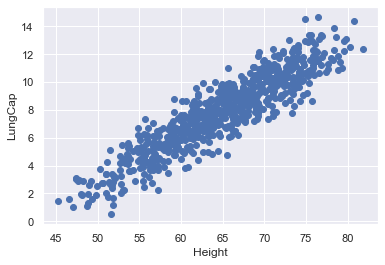

In [23]:
plt.scatter(df.Height, df.LungCap);
plt.xlabel("Height")
plt.ylabel("LungCap");

In [24]:
##EDA : Exploratory Data Analysis

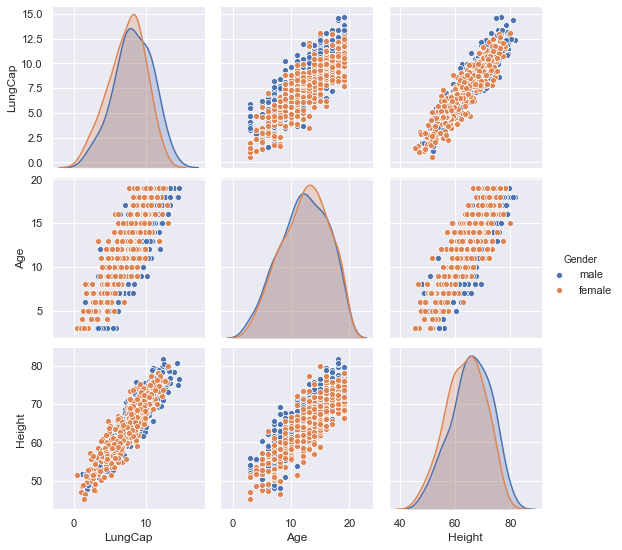

In [25]:
sns.pairplot(df,hue='Gender');

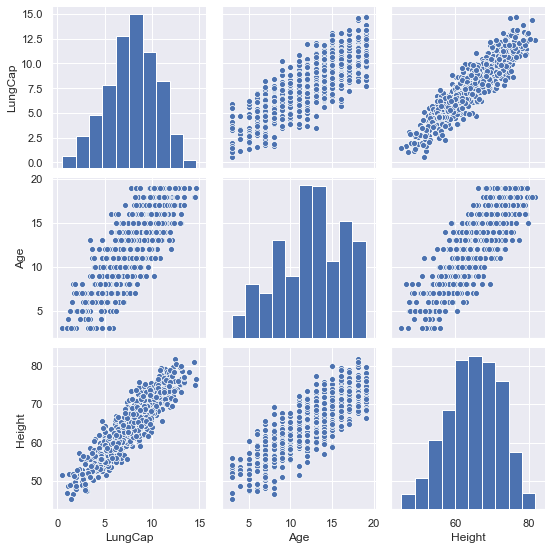

In [26]:
sns.pairplot(df)

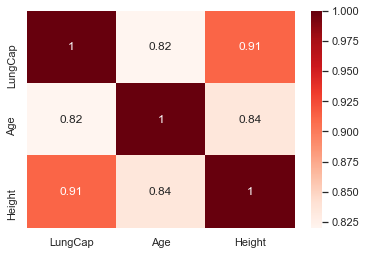

In [27]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

In [28]:
y.shape

(725, 1)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

################################################################################

#Scale the inputs
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [36]:
X_test

,LungCap,Age,Height,Smoke_yes,Gender_male
0,0.202496,0.682209,0.592709,-0.327576,1.027173
1,0.781408,0.682209,0.151750,-0.327576,-0.973546
2,0.294386,0.682209,0.096630,-0.327576,-0.973546
3,1.194917,0.187263,0.124190,-0.327576,1.027173
4,-0.587766,-0.802629,-0.110069,-0.327576,-0.973546
...,...,...,...,...,...
235,-0.348850,0.187263,-0.619928,-0.327576,1.027173
236,-1.028842,-1.545048,-0.867967,-0.327576,1.027173
237,-2.443961,-2.039993,-2.204623,-0.327576,-0.973546
238,-0.183446,-0.060210,0.413569,-0.327576,1.027173


In [37]:
y_test

,yes
326,0
518,0
554,0
33,1
375,1
...,...
648,0
140,0
28,0
43,0


In [38]:
X_train

,LungCap,Age,Height,Smoke_yes,Gender_male
0,0.018714,0.187263,0.868308,-0.327576,-0.973546
1,0.211685,1.177155,0.206870,-0.327576,1.027173
2,1.268430,1.672101,1.391946,-0.327576,-0.973546
3,0.891677,0.929682,0.551369,-0.327576,1.027173
4,-0.881817,-0.307683,-0.743947,3.052728,-0.973546
...,...,...,...,...,...
480,0.707895,-0.307683,1.061227,-0.327576,1.027173
481,1.139782,0.929682,1.488406,-0.327576,1.027173
482,-0.615333,-0.555156,-1.005766,-0.327576,-0.973546
483,1.295997,0.682209,1.240367,-0.327576,1.027173


In [39]:
y_train

,yes
73,0
167,0
250,0
633,0
66,0
...,...
71,0
106,0
270,0
435,0


# building a randomforest algorithm for prediction

## instead of randomforest model use linear or logistic regression and calculate the accuracy

In [40]:
from sklearn.ensemble import RandomForestClassifier

rand=RandomForestClassifier().fit(X_train,y_train) # initialize & fit the model
y_pred=rand.predict(X_test) # now predict

In [41]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred)

0.7458333333333333